In [1]:
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer

c:\Users\rsaif\OneDrive - McGill University\COMP-551\COMP-551\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download emotion dataset to without separate train/test splits
dataset = load_dataset("emotion", cache_dir="./data")

In [3]:
# Tokenize the dataset
vectorizer = CountVectorizer()
# Extract text and labels
X = vectorizer.fit_transform(dataset["train"]["text"])
# dataset["train"]["text"]
X = X.toarray()
import numpy as np 
np.argwhere(X[0, :] == 1)
y = np.array(dataset["train"]["label"]).reshape(-1, 1)

In [4]:
X_test = vectorizer.transform(dataset["test"]["text"])
X_test = X_test.toarray()
y_test = np.array(dataset["test"]["label"]).reshape(-1, 1)

In [5]:
from naive_bayes import NaiveBayes
# Train the model
model = NaiveBayes()
model.fit(X, y)
# Predict on the test set
# y_pred = model.predict(X_test)
alpha_test_list = [0.1, 0.5, 1, 5, 10, 50, 100]
acc_list = []
for alpha in alpha_test_list:
    model.alpha = alpha
    acc_list.append(model.evaluate_acc(X_test, y_test))
acc_list

[0.7805, 0.8, 0.7635, 0.6055, 0.555, 0.431, 0.389]

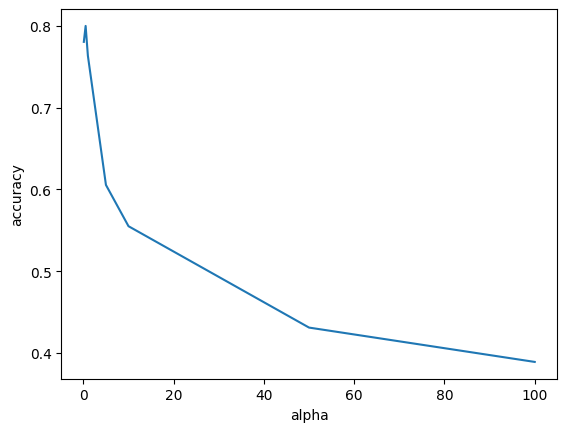

In [6]:
alpha_np = np.array(alpha_test_list)
acc_np = np.array(acc_list)
import matplotlib.pyplot as plt
plt.plot(alpha_np, acc_np)
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.show()
